In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/thyroid-cancer-risk-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.70M/3.70M [00:00<00:00, 58.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset/versions/1


In [3]:
data= "/root/.cache/kagglehub/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset/versions/1"

files = os.listdir(data)
print("Arquivos disponíveis no dataset:", files)

Arquivos disponíveis no dataset: ['thyroid_cancer_risk_data.csv']


In [4]:
for file in files:
    file_path = os.path.join(data, file)

    # Verificar se é um arquivo CSV
    if file.endswith(".csv"):
        df = pd.read_csv(file_path)
        print(f"\nArquivo CSV carregado: {file}")
        break

else:
    df = None
    print("Nenhum arquivo válido encontrado.")

# Exibir as primeiras linhas do dataset carregado
if df is not None:
    print("\nPrimeiras linhas do dataset:")
    print(df.head())  # Exibe as 5 primeiras linhas



Arquivo CSV carregado: thyroid_cancer_risk_data.csv

Primeiras linhas do dataset:
   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Di

In [5]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [6]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [7]:
df.shape

(212691, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [9]:
#check unique values in each column
print("\n Unique value per column")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} unique values")


 Unique value per column
Patient_ID: 212691 unique values
Age: 75 unique values
Gender: 2 unique values
Country: 10 unique values
Ethnicity: 5 unique values
Family_History: 2 unique values
Radiation_Exposure: 2 unique values
Iodine_Deficiency: 2 unique values
Smoking: 2 unique values
Obesity: 2 unique values
Diabetes: 2 unique values
TSH_Level: 991 unique values
T3_Level: 301 unique values
T4_Level: 751 unique values
Nodule_Size: 501 unique values
Thyroid_Cancer_Risk: 3 unique values
Diagnosis: 2 unique values


In [10]:
#summary statistics for numerical columns
print(df.describe())

         Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [11]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include = ['object']).columns

print('\nNumerical Columns:', list(numerical_cols))
print('\nCategorical Columns:', list(categorical_cols))


Numerical Columns: ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

Categorical Columns: ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']


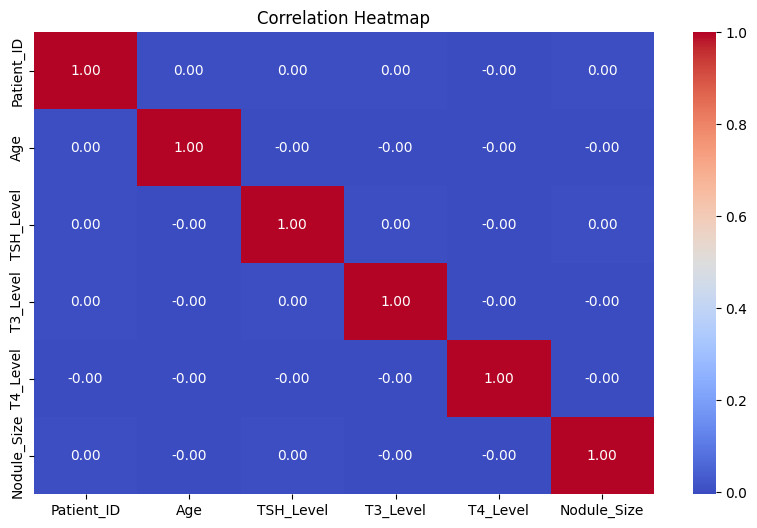

In [12]:
#correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df[numerical_cols].corr(), annot= True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

- In the context of the dataset, this suggests that the analyzed variables have low correlations or independence from each other.
- This can be useful, as variables with low correlations often help improve the quality of predictive models by avoiding redundancies

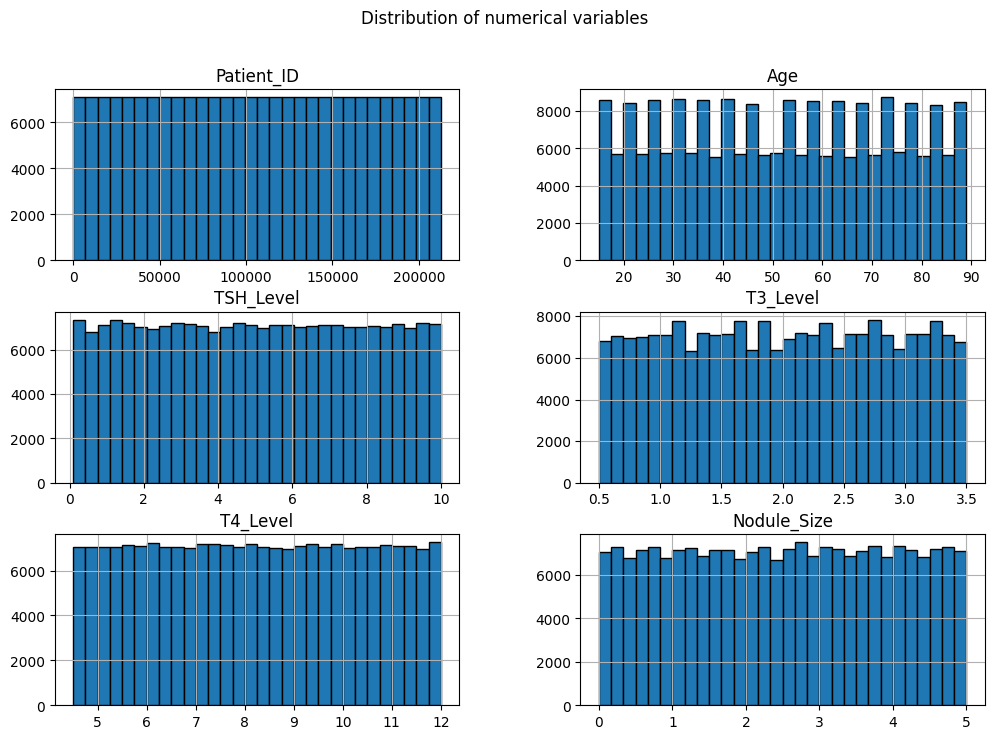

In [13]:
df[numerical_cols].hist(figsize = (12, 8), bins = 30, edgecolor = 'black')
plt.suptitle("Distribution of numerical variables")
plt.show()

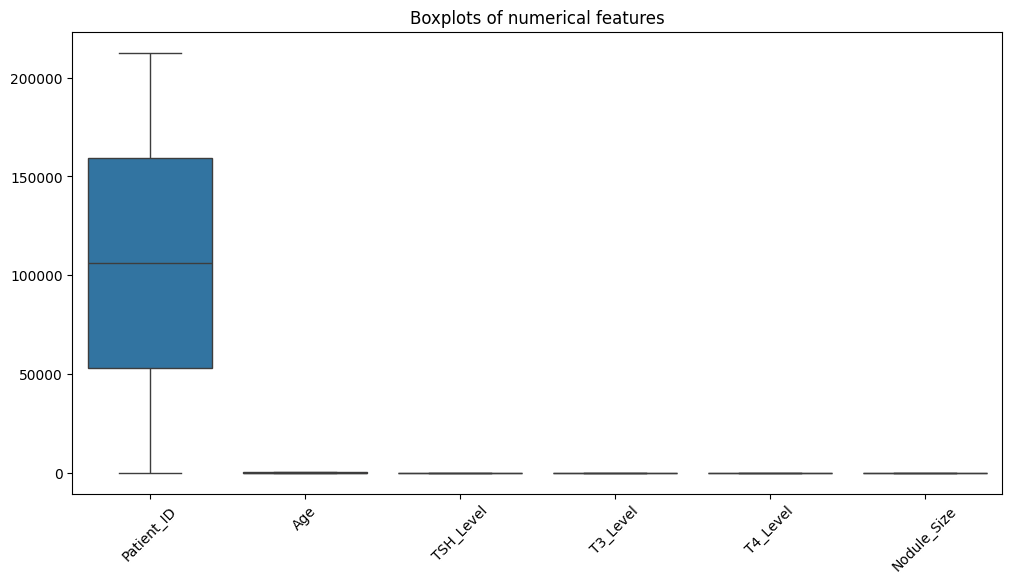

In [14]:
#boxplots for numerical columns to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of numerical features")
plt.show()

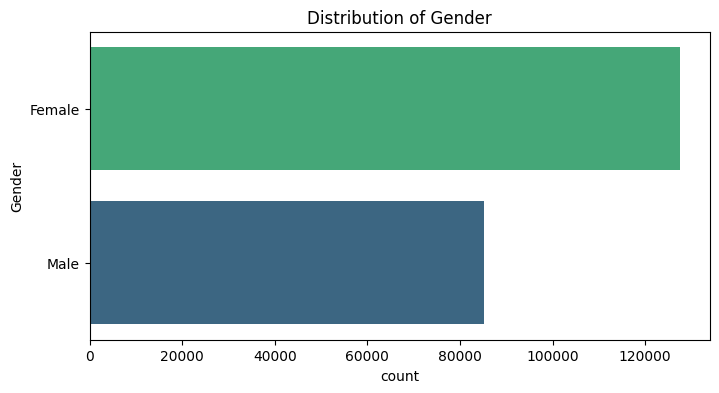

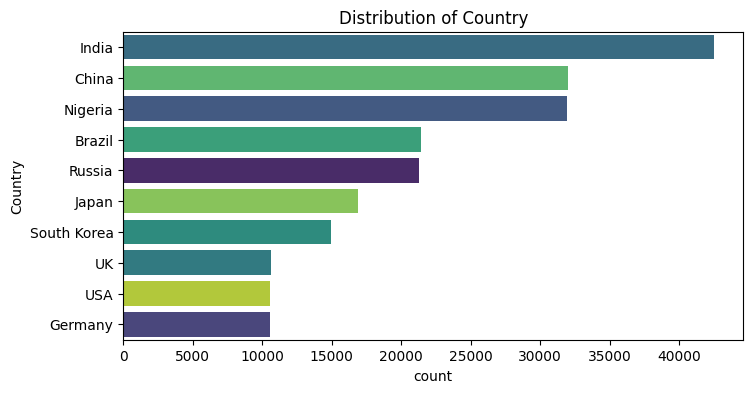

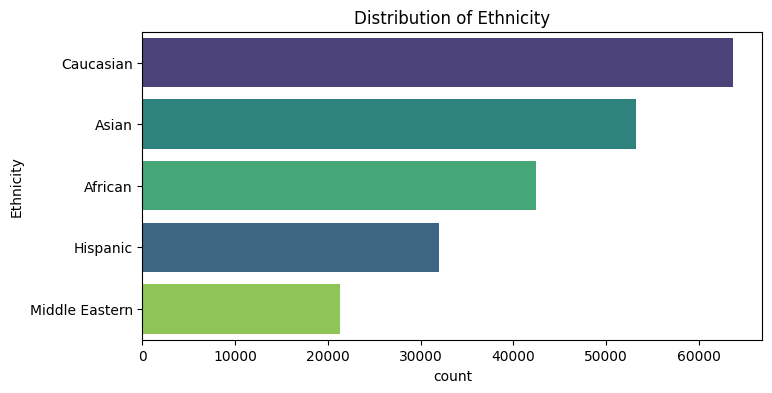

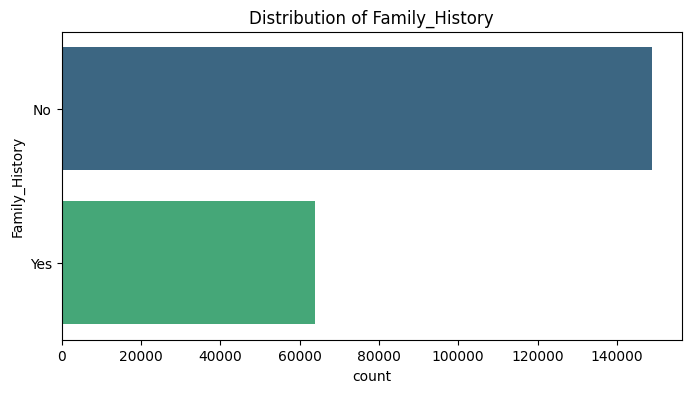

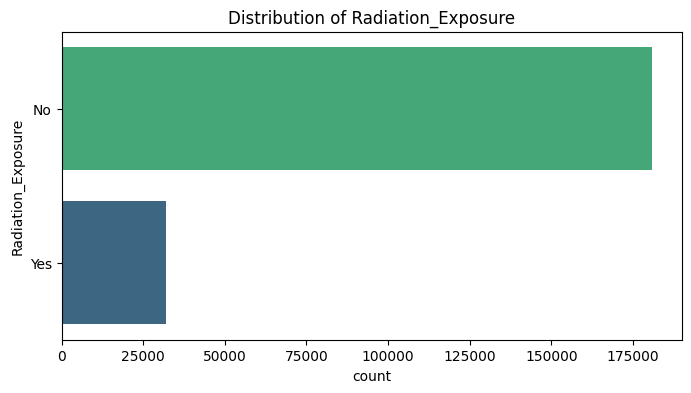

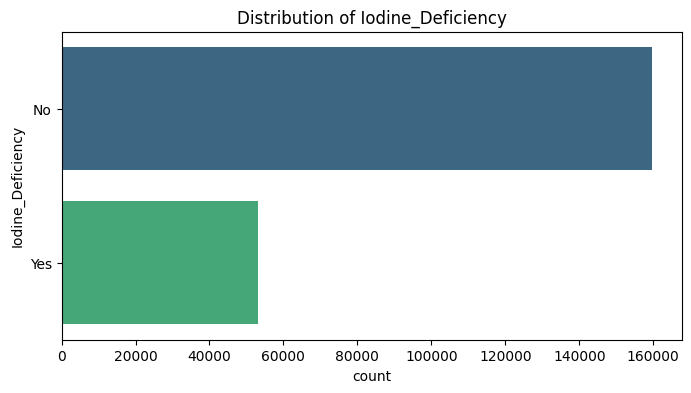

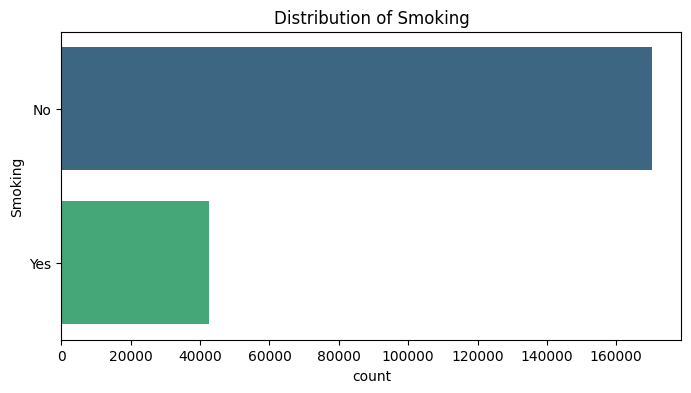

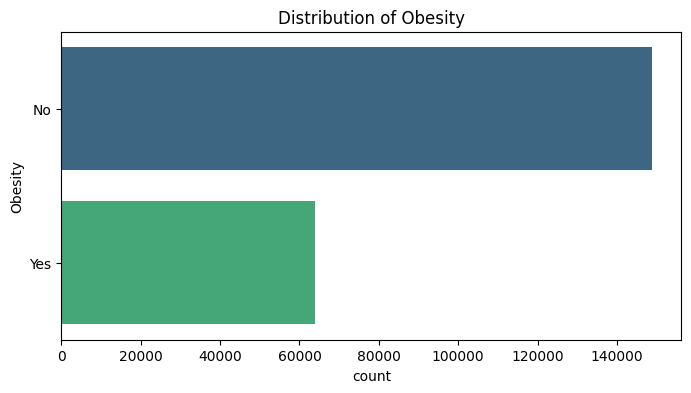

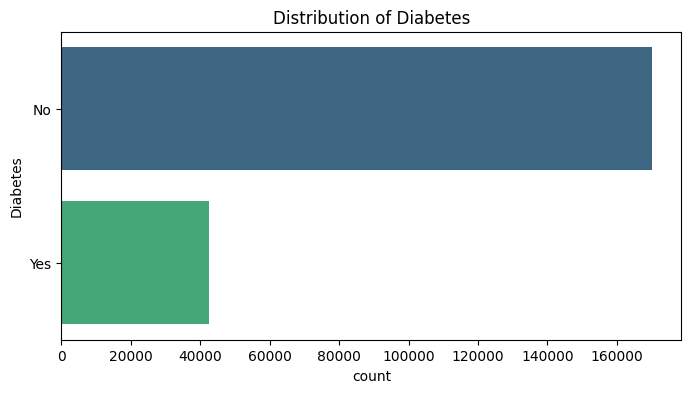

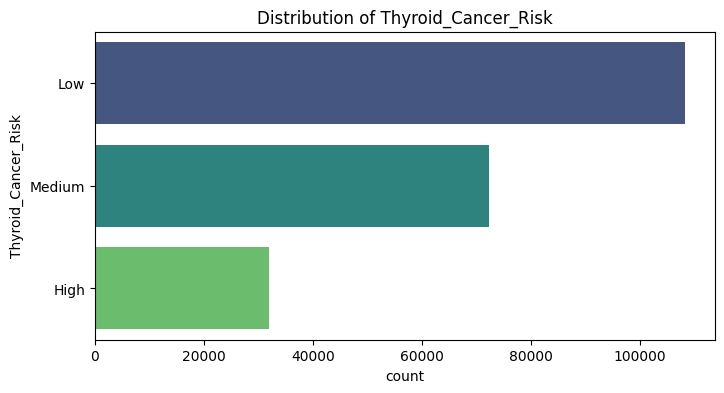

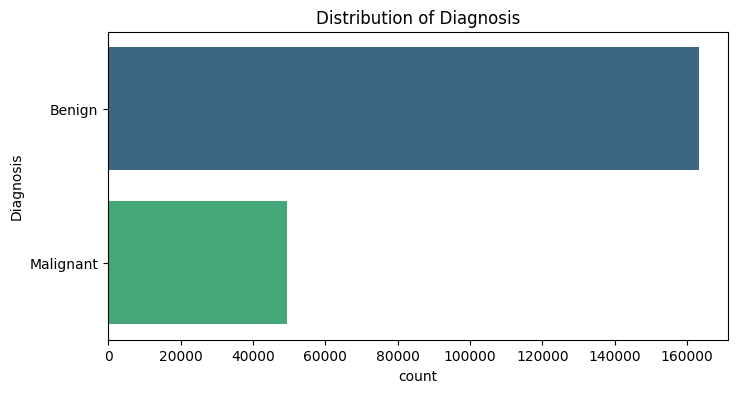

In [15]:
for col in categorical_cols:
  plt.figure(figsize=(8, 4))
  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis", hue = df[col], legend = False)
  plt.title(f"Distribution of {col}")
  plt.show()

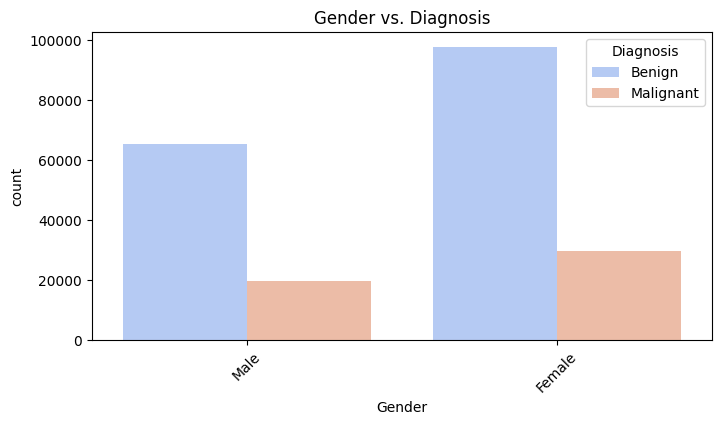

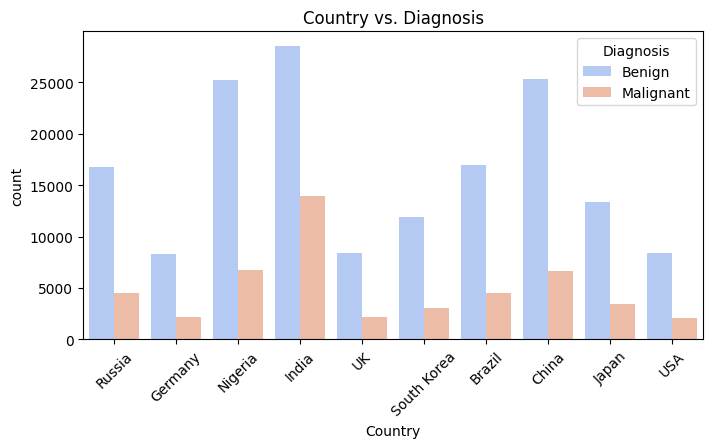

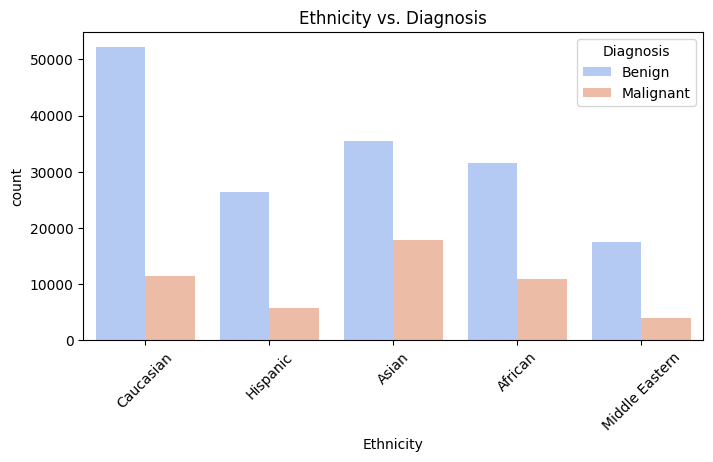

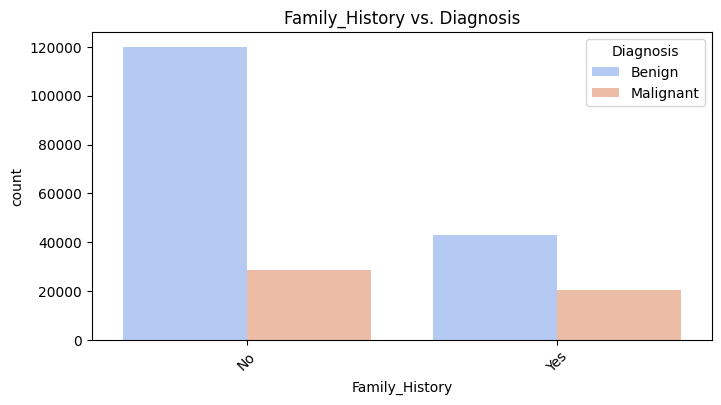

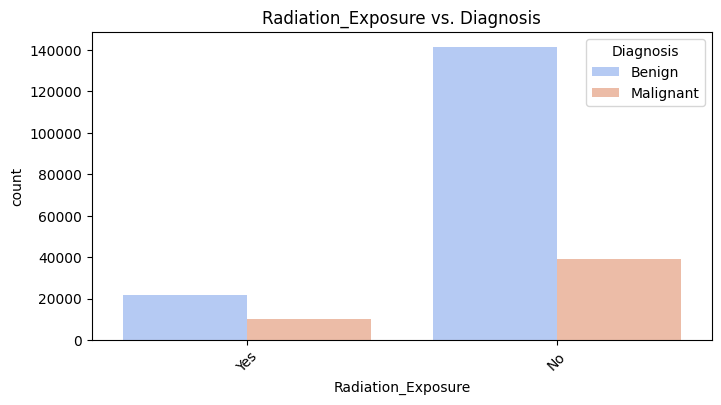

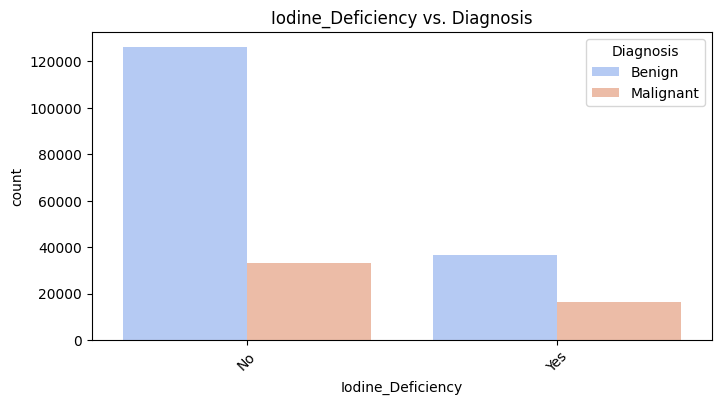

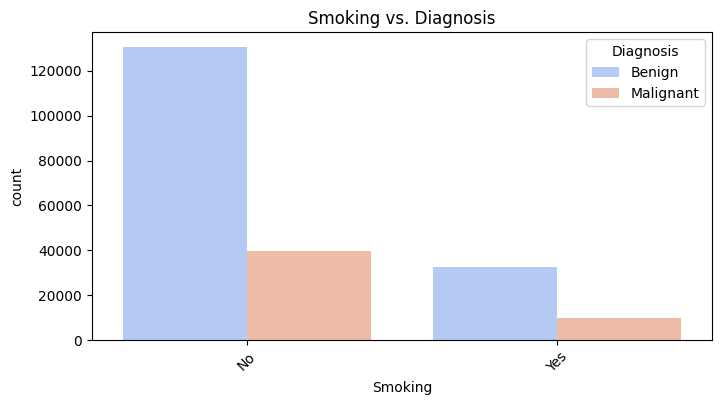

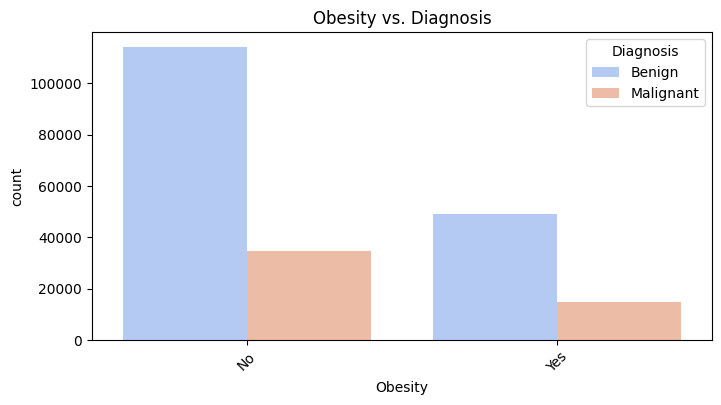

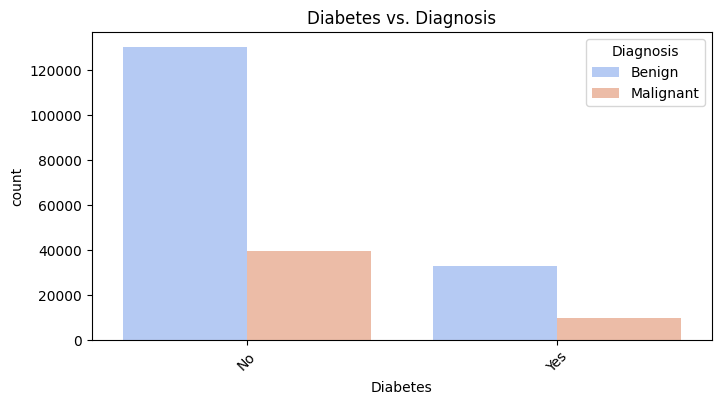

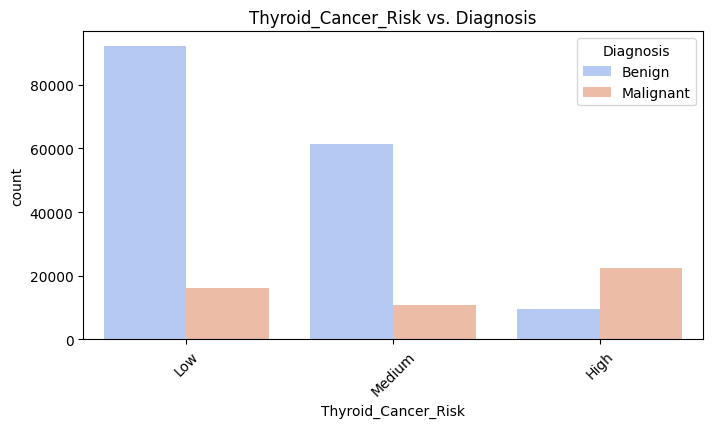

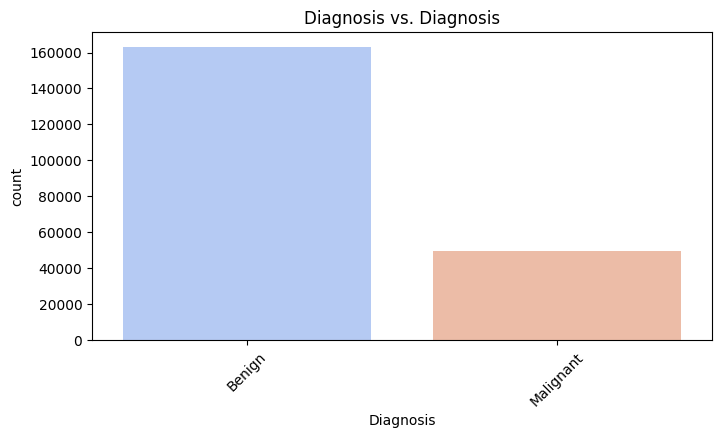

In [16]:
for col in categorical_cols:
  plt.figure(figsize= (8, 4))
  sns.countplot(x=df[col], hue=df['Diagnosis'], palette = 'coolwarm')
  plt.title(f"{col} vs. Diagnosis")
  plt.xticks(rotation=45)
  plt.show()

<ipython-input-17-50a28b5dd19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")


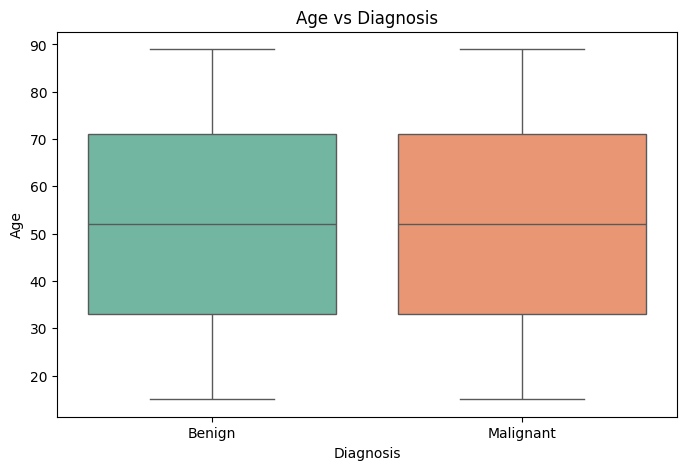

<ipython-input-17-50a28b5dd19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")


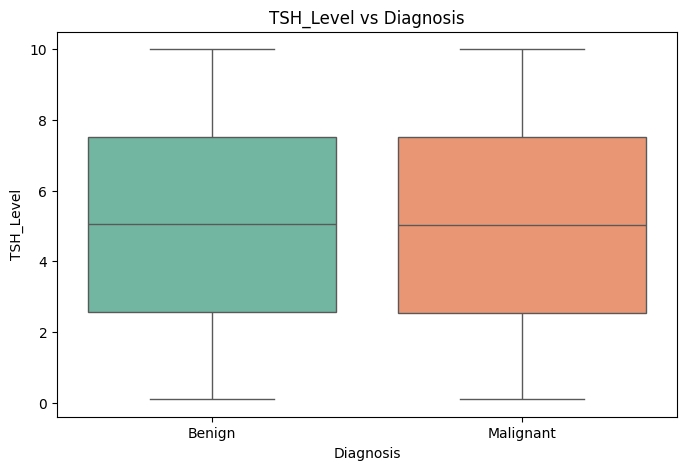

<ipython-input-17-50a28b5dd19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")


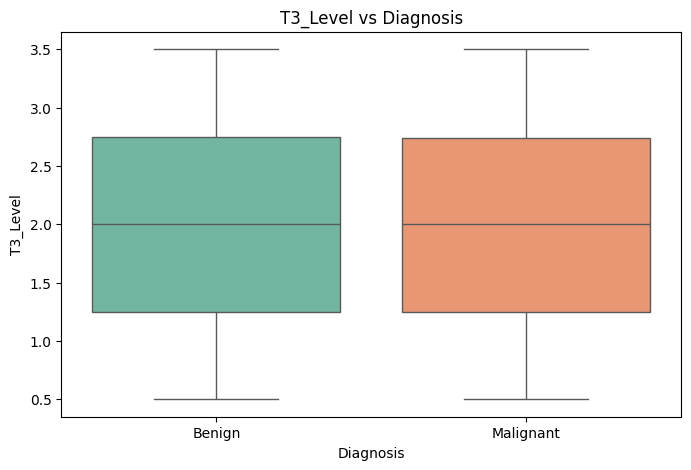

<ipython-input-17-50a28b5dd19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")


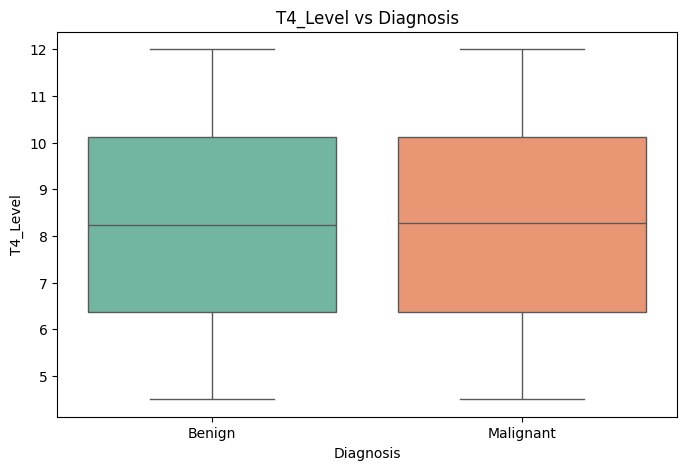

<ipython-input-17-50a28b5dd19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")


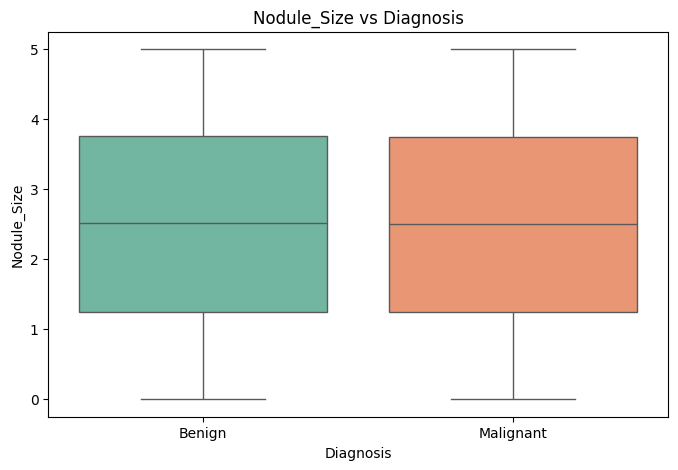

In [17]:
for col in ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df['Diagnosis'], y= df[col], palette="Set2")
  plt.title(f"{col} vs Diagnosis")
  plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#copy the dataset to avoid modifying original
dataf = df.copy()

#Encode categorical variables
label_encoders = {}
for col in dataf.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  dataf[col] = le.fit_transform(dataf[col])
  label_encoders[col] = le

#standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
dataf[numerical_cols] = scaler.fit_transform(dataf[numerical_cols])

#apply PCA to reduce to 3 dimensions
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(dataf.drop(columns = ['Diagnosis']))
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd

#copy the dataset to avoid modifying original
dataf = df.copy()

#Encode categorical variables
label_encoders = {}
for col in dataf.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  dataf[col] = le.fit_transform(dataf[col])
  label_encoders[col] = le

#standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
dataf[numerical_cols] = scaler.fit_transform(dataf[numerical_cols])

#apply PCA to reduce to 3 dimensions
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(dataf.drop(columns = ['Diagnosis']))

#Create a new DataFram with PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
pca_df['Diagnosis'] = dataf['Diagnosis'] #add target variable back






/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


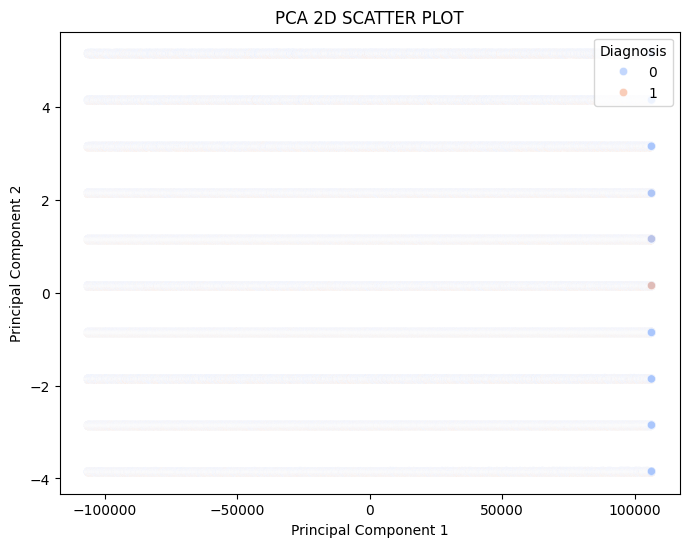

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y = pca_df['PC2'], hue=pca_df['Diagnosis'], palette= "coolwarm", alpha = 0.7)
plt.title("PCA 2D SCATTER PLOT")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#Classification


In [20]:
#copy the dataset to avoid modifying original
dataf = df.copy()

label_encoders = {}
for col in dataf.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  dataf[col] = le.fit_transform(df[col])
  label_encoders[col] = le

#Define features and target
X = dataf.drop(columns=['Diagnosis']) #Features
y = dataf['Diagnosis'] #target

#Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

#Train and evaluate models
results =  {}
for name, model in models.items():
  model.fit(X_train, y_train) #train
  y_pred = model.predict(X_test) #predict
  acc = accuracy_score(y_test, y_pred) #accuracy
  results[name] = acc

  #print classification report
  print(f"Model: {name}")
  print(classification_report(y_test, y_pred))
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
  print("-" * 50)



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     32615
           1       0.69      0.42      0.52      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.68      0.71     42539
weighted avg       0.81      0.82      0.80     42539

Confusion Matrix: 
 [[30773  1842]
 [ 5748  4176]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539

Confusion Matrix: 
 [[30684  1931]
 [ 5535  4389]]
--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0  

<ipython-input-21-8282a5ef1d8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y = list(results.values()), palette = "coolwarm")


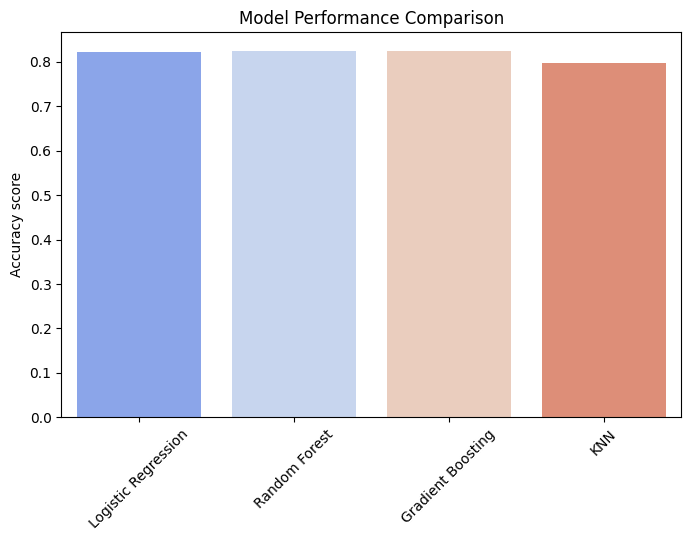

In [21]:
#compare model performance
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y = list(results.values()), palette = "coolwarm")
plt.ylabel("Accuracy score")
plt.title("Model Performance Comparison")
plt.xticks(rotation = 45)
plt.show()